# Machine Learning Hackathon 
Problem Statement 
You are hired as a data scientist at a leading shopping mall in the country. The shopping mall has tied 
up with different restaurants/bars to provide discount coupons to all its customers. The coupons 
increase the footfalls at these restaurants and help the shopping mall to attract more customers. 
The organization has been relying upon simple guidelines to determine what coupons are to be 
provided to the customers, however, the organization feels that they need a more robust model to 
determine whether a customer will accept the recommended coupon or not to improve the use 
rate. The organization plans to use a mix of client's details that they have captured to create this 
model. 
You are provided with the historical data of the recommended coupons along with customer 
details in the previous years and your task is to come up with a model which would be able to 
predict whether a customer will accept the recommended coupon

In [1]:
#Regular Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [134]:
#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV


#For Model Building
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

#For obtaining performance metrics


#For Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [4]:
#1. Load the train data
data_train = pd.read_csv('train.csv')
print("Shape of the Train Data:", data_train.shape)
data_train.head()

Shape of the Train Data: (10147, 27)


,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,318369,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,320906,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,412393,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,290854,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,...,less1,4~8,less1,never,1,1,0,0,1,0


In [5]:
#load the test data-set
data_test = pd.read_csv('test.csv')
print("Shape of the Test Data:", data_test.shape)
data_test.head()

Shape of the Test Data: (2537, 26)


,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,374679,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,below21,...,never,1~3,less1,4~8,less1,1,0,0,0,1
1,469678,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,...,1~3,never,gt8,4~8,1~3,1,1,0,1,0
2,216140,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,26,...,never,never,1~3,less1,never,1,1,0,0,1
3,184301,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,50plus,...,never,4~8,4~8,1~3,less1,1,1,0,0,1
4,148720,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,26,...,never,never,1~3,4~8,less1,1,1,0,0,1


In [6]:
#no of Features is 26 and Target Column is Y
target_col = 'Y'
len(data_train.columns.drop(target_col))

26

## Data Cleaning

In [7]:
#2.Check for data completeness
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [8]:
# Time converting to Integer values by using date time format
data_train['time'] = pd.to_datetime(data_train['time'],format = '%I%p').dt.hour
data_test['time'] = pd.to_datetime(data_test['time'],format = '%I%p').dt.hour

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  int64 
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [10]:
# drop the Car column because it has less then 1% values only
data_train.drop(columns = 'car', axis=1, inplace = True)
data_test.drop(columns = 'car', axis=1, inplace = True)

In [11]:
#3. Deal with Missing data
#
#Missing value in the Data-Set
data_train.isna().sum()

customer_id               0
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                      88
CoffeeHouse             172
CarryAway               122
RestaurantLessThan20     97
Restaurant20To50        148
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [12]:
#Checking for unique values in categorical columns
for i in data_train.columns:
    if data_train[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data_train[i].unique())
        print()

destination: 
 ['No Urgent Place' 'Work' 'Home']

passanger: 
 ['Friend(s)' 'Alone' 'Partner' 'Kid(s)']

weather: 
 ['Sunny' 'Rainy' 'Snowy']

coupon: 
 ['Restaurant(<20)' 'Coffee House' 'Restaurant(20-50)' 'Bar'
 'Carry out & Take away']

expiration: 
 ['1d' '2h']

gender: 
 ['Male' 'Female']

age: 
 ['21' '26' '31' '50plus' '36' '41' '46' 'below21']

maritalStatus: 
 ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

education: 
 ['Some college - no degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'Associates degree'
 'High School Graduate' 'Some High School']

occupation: 
 ['Student' 'Computer & Mathematical' 'Unemployed' 'Healthcare Support'
 'Retired' 'Food Preparation & Serving Related' 'Sales & Related'
 'Architecture & Engineering' 'Education&Training&Library'
 'Arts Design Entertainment Sports & Media' 'Management'
 'Community & Social Services' 'Life Physical Social Science'
 'Transportation & Material Moving' 'Farming Fishing & Forest

In [13]:
# Mode Imputation of Missing Values for Categorical Variables
Bar_Mode = data_train["Bar"].mode()[0]
CoffeeHouse_Mode = data_train["CoffeeHouse"].mode()[0]
CarryAway_Mode = data_train["CarryAway"].mode()[0]
RestaurantLessThan20_Mode = data_train["RestaurantLessThan20"].mode()[0]
Restaurant20To50_Mode = data_train["Restaurant20To50"].mode()[0]

#Train-Data
data_train["Bar"] = data_train["Bar"].fillna(Bar_Mode)
data_train["CoffeeHouse"] = data_train["CoffeeHouse"].fillna(CoffeeHouse_Mode)
data_train["CarryAway"] = data_train["CarryAway"].fillna(CarryAway_Mode)
data_train["RestaurantLessThan20"] = data_train["RestaurantLessThan20"].fillna(RestaurantLessThan20_Mode)
data_train["Restaurant20To50"] = data_train["Restaurant20To50"].fillna(Restaurant20To50_Mode)

#Test-Data
data_test["Bar"] = data_test["Bar"].fillna(Bar_Mode)
data_test["CoffeeHouse"] = data_test["CoffeeHouse"].fillna(CoffeeHouse_Mode)
data_test["CarryAway"] = data_test["CarryAway"].fillna(CarryAway_Mode)
data_test["RestaurantLessThan20"] = data_test["RestaurantLessThan20"].fillna(RestaurantLessThan20_Mode)
data_test["Restaurant20To50"] = data_train["Restaurant20To50"].fillna(Restaurant20To50_Mode)

In [14]:
#Age column
data_train["age"].value_counts()

21         2133
26         2033
31         1636
50plus     1431
36         1065
41          879
46          538
below21     432
Name: age, dtype: int64

In [15]:
# 50 plus and below 21 categories in the data can be converted to 51 and 20 respectively and the Age gets conevrted to Integer
data_train['age'] = data_train['age'].apply(lambda x: 51 if x == '50plus' else (20 if x=='below21' else x))
data_test['age'] = data_test['age'].apply(lambda x: 51 if x == '50plus' else (20 if x=='below21' else x))

In [16]:
# Converting age to numerical data type
data_train['age'] = data_train['age'].astype('int64')
data_test['age'] = data_test['age'].astype('int64')

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  int64 
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  int64 
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  Bar                   10147 non-null

##### *Now There is no missing value in the Train & Test Data-Set

In [18]:
#Numerical Columns
data_train._get_numeric_data()

,customer_id,temperature,time,age,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,80,18,21,0,1,1,0,0,1,1
1,318369,80,7,21,0,1,0,0,1,0,0
2,320906,80,10,21,0,1,1,0,0,1,0
3,412393,55,7,26,0,1,1,1,0,1,0
4,290854,30,18,31,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10142,201838,80,18,20,0,1,1,0,1,0,0
10143,248838,80,18,26,0,1,0,0,1,0,1
10144,173367,80,10,21,0,1,0,0,0,1,1
10145,488688,30,22,46,1,1,0,0,0,1,0


In [19]:
#Categorical/Object Columns
data_train.describe(include='object')

,destination,passanger,weather,coupon,expiration,gender,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147,10147
unique,3,4,3,5,2,2,5,6,25,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,Coffee House,1d,Female,Married partner,Bachelors degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1
freq,5045,5802,8015,3191,5643,5204,4086,3511,1485,1622,4238,2868,3863,4393,5037


## Univariate Analysis

### Target Variable = 'Y'

In [20]:
#Checking the distribution of target variable in terms of percentage
data_train['Y'].value_counts(normalize=True)

1    0.568444
0    0.431556
Name: Y, dtype: float64

<AxesSubplot:xlabel='Y', ylabel='count'>

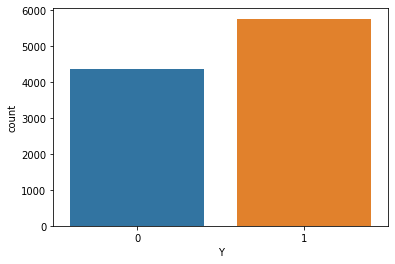

In [21]:
sns.countplot(data_train['Y'])

<AxesSubplot:ylabel='Y'>

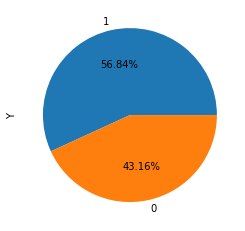

In [22]:
data_train.Y.value_counts().plot.pie(autopct = '%.2f%%')

###### **It is clear that Target Variable 'Y' has 56.84% data with Category 1 (YES) and 43.16% with Category 0 (NO) - so that Train Data-set is mostly balanced for the given Target.

### Deep-Insight of destination

In [23]:
#destination has 3 distinct values
data_train["destination"].value_counts()

No Urgent Place    5045
Home               2572
Work               2530
Name: destination, dtype: int64

<Figure size 720x360 with 0 Axes>

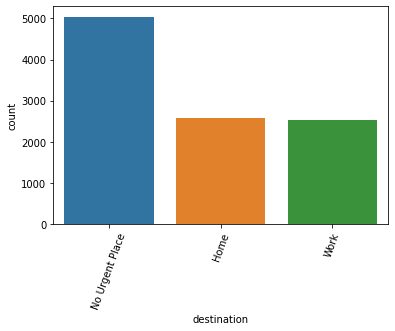

<Figure size 720x360 with 0 Axes>

In [24]:
#bar graph for destination
chart = sns.countplot(data_train["destination"], order = data_train["destination"].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [25]:
# Check the outliers based on coupon usage (With in Y) in destination
destination = data_train[data_train['Y']==1]['destination'].value_counts()
print(destination.sum())
destination

5768


No Urgent Place    3198
Home               1299
Work               1271
Name: destination, dtype: int64

<AxesSubplot:ylabel='Density'>

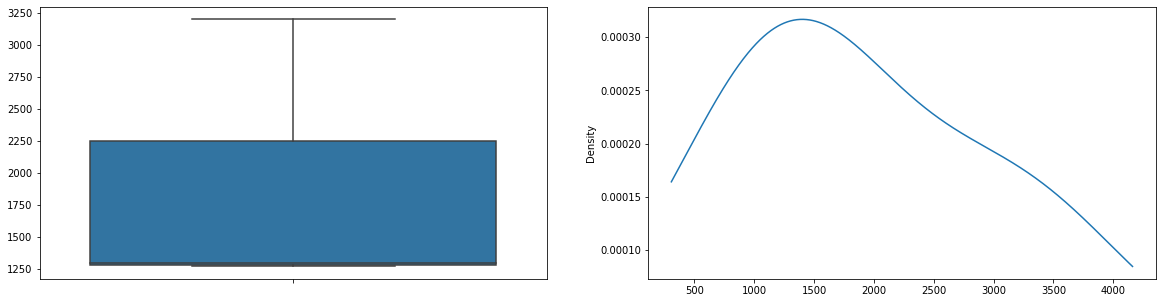

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.boxplot(data=destination,y=destination.values, ax=ax[0])
destination.plot.kde(ax = ax[1])

In [27]:
print(destination.skew())

1.7307987575468322


#### **Destination doesn;t have outliers, though there exists skewness

### Deep-Insight passanger

In [28]:
#passanger has 4 distinct values
data_train["passanger"].value_counts()

Alone        5802
Friend(s)    2676
Partner       855
Kid(s)        814
Name: passanger, dtype: int64

<Figure size 720x360 with 0 Axes>

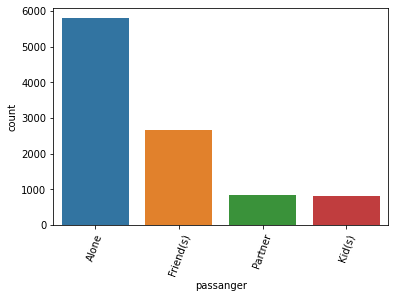

<Figure size 720x360 with 0 Axes>

In [29]:
chart = sns.countplot(data_train['passanger'], order = data_train['passanger'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [30]:
# Check the outliers based on coupon usage (With in Y) in passanger
passanger = data_train[data_train['Y']==1]['passanger'].value_counts()
print(passanger.sum())
passanger

5768


Alone        3049
Friend(s)    1800
Partner       510
Kid(s)        409
Name: passanger, dtype: int64

<AxesSubplot:ylabel='Density'>

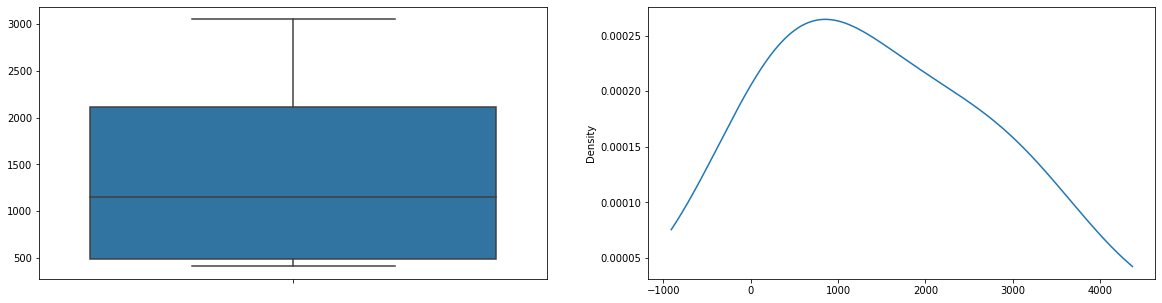

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.boxplot(data=passanger,y=passanger.values, ax=ax[0])
passanger.plot.kde(ax = ax[1])

In [32]:
print(passanger.skew())

0.7899972523633265


#### **Passanger doesn;t have outliers, though there exists skewness

### Deep-Insight of weather

In [33]:
#weather has 3 distinct values
data_train["weather"].value_counts()

Sunny    8015
Snowy    1142
Rainy     990
Name: weather, dtype: int64

<Figure size 720x360 with 0 Axes>

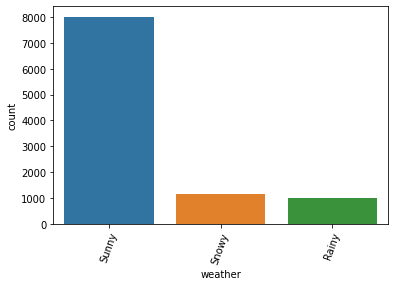

<Figure size 720x360 with 0 Axes>

In [34]:
chart = sns.countplot(data_train['weather'], order = data_train['weather'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [35]:
# Check the outliers based on coupon usage (With in Y) in weather
weather = data_train[data_train['Y']==1]['weather'].value_counts()
print(weather.sum())
weather

5768


Sunny    4757
Snowy     546
Rainy     465
Name: weather, dtype: int64

<AxesSubplot:ylabel='Density'>

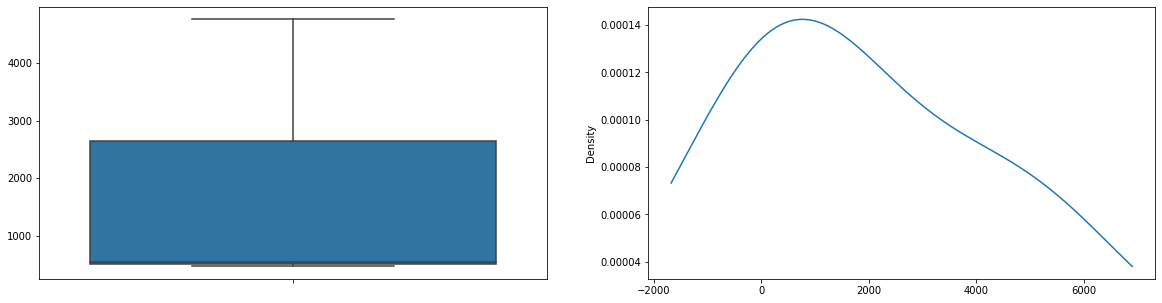

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.boxplot(data=weather,y=weather.values, ax=ax[0])
weather.plot.kde(ax = ax[1])

In [37]:
print(weather.skew())

1.7299297492720773


#### **Weather doesn;t have outliers, though there exists left skewness

### Deep-Insight of coupon

In [38]:
#coupon has 5 distinct values
data_train["coupon"].value_counts()

Coffee House             3191
Restaurant(<20)          2233
Carry out & Take away    1923
Bar                      1623
Restaurant(20-50)        1177
Name: coupon, dtype: int64

<Figure size 720x360 with 0 Axes>

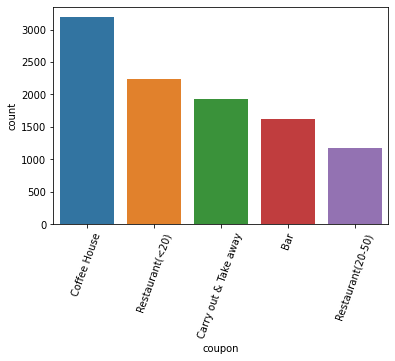

<Figure size 720x360 with 0 Axes>

In [39]:
chart = sns.countplot(data_train['coupon'], order = data_train['coupon'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [40]:
# Check the outliers based on coupon usage (With in Y) in coupon
coupon = data_train[data_train['Y']==1]['coupon'].value_counts()
print(coupon.sum())
coupon

5768


Coffee House             1600
Restaurant(<20)          1575
Carry out & Take away    1414
Bar                       664
Restaurant(20-50)         515
Name: coupon, dtype: int64

<AxesSubplot:ylabel='Density'>

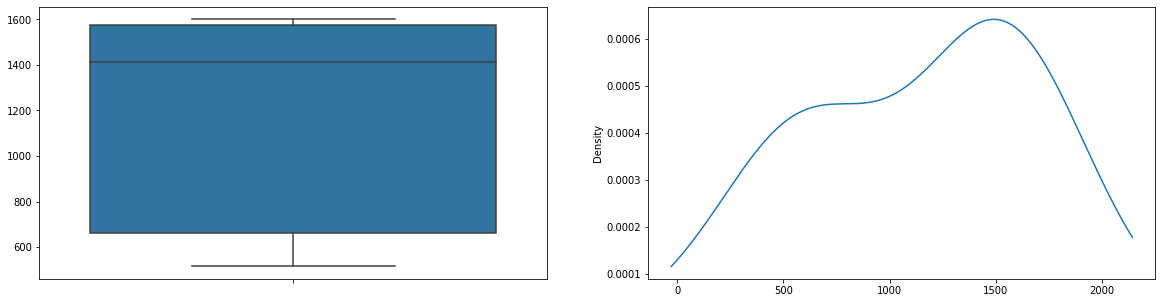

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.boxplot(data=coupon,y=coupon.values, ax=ax[0])
coupon.plot.kde(ax = ax[1])

In [42]:
print(coupon.skew())

-0.5734002084393751


#### **Coupon doesn;t have outliers, though there exists left skewnes

### Deep-Insight of expiration

In [43]:
#expiration has 2 distinct values
data_train["expiration"].value_counts()

1d    5643
2h    4504
Name: expiration, dtype: int64

<Figure size 720x360 with 0 Axes>

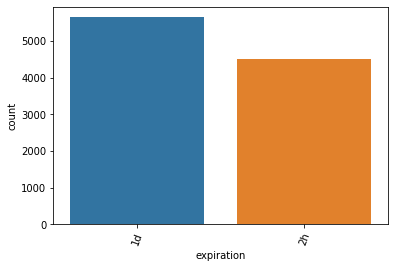

<Figure size 720x360 with 0 Axes>

In [44]:
chart = sns.countplot(data_train['expiration'], order = data_train['expiration'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

### Deep-Insight of gender

In [45]:
#gender has 2 distinct values
data_train["gender"].value_counts()

Female    5204
Male      4943
Name: gender, dtype: int64

<Figure size 720x360 with 0 Axes>

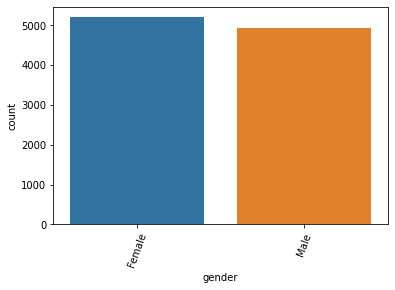

<Figure size 720x360 with 0 Axes>

In [46]:
chart = sns.countplot(data_train['gender'], order = data_train['gender'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

### Deep-Insight of maritalStatus

In [47]:
#maritalStatus has 5 distinct values
data_train["maritalStatus"].value_counts()

Married partner      4086
Single               3806
Unmarried partner    1737
Divorced              417
Widowed               101
Name: maritalStatus, dtype: int64

<Figure size 720x360 with 0 Axes>

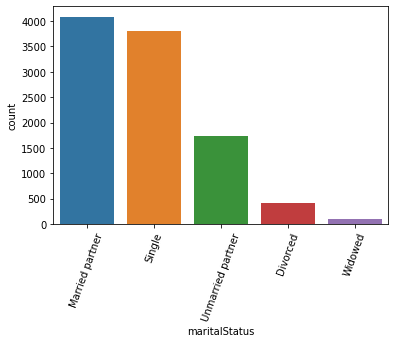

<Figure size 720x360 with 0 Axes>

In [48]:
chart = sns.countplot(data_train['maritalStatus'], order = data_train['maritalStatus'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [49]:
# Check the outliers based on maritalStatus usage (With in Y) in maritalStatus
maritalStatus = data_train[data_train['Y']==1]['maritalStatus'].value_counts()
print(maritalStatus.sum())
maritalStatus

5768


Single               2296
Married partner      2224
Unmarried partner     968
Divorced              232
Widowed                48
Name: maritalStatus, dtype: int64

<AxesSubplot:ylabel='Density'>

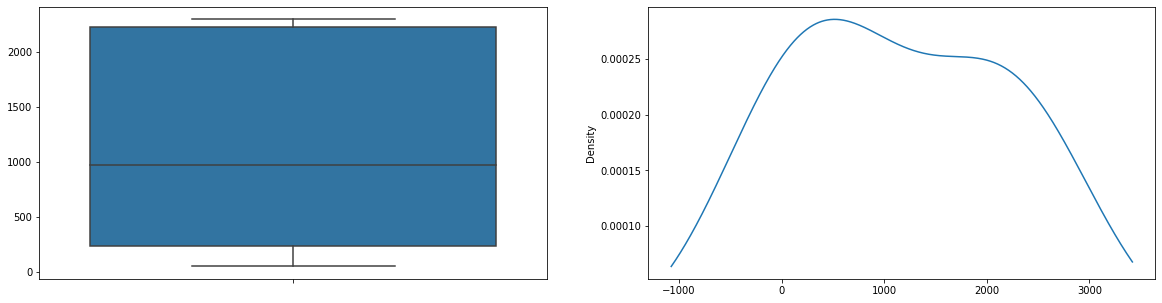

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.boxplot(data=maritalStatus,y=maritalStatus.values, ax=ax[0])
maritalStatus.plot.kde(ax = ax[1])

In [51]:
print(maritalStatus.skew())

0.1976308791571414


#### **maritalStatus doesn;t have outliers, though there exists left skewness

### Deep-Insight of education

In [52]:
#education has 6 distinct values
data_train["education"].value_counts()

Bachelors degree                          3511
Some college - no degree                  3459
Graduate degree (Masters or Doctorate)    1477
Associates degree                          924
High School Graduate                       708
Some High School                            68
Name: education, dtype: int64

<Figure size 720x360 with 0 Axes>

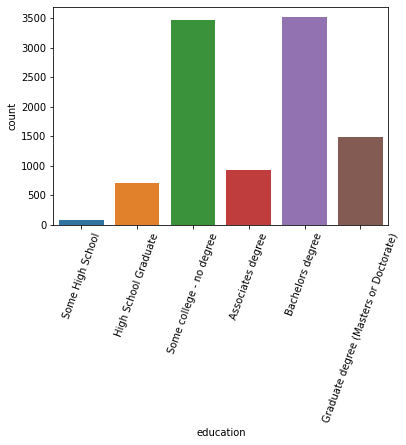

<Figure size 720x360 with 0 Axes>

In [53]:
education_order = ["Some High School", "High School Graduate", "Some college - no degree", "Associates degree", "Bachelors degree", "Graduate degree (Masters or Doctorate)"]
chart = sns.countplot(data_train['education'], order = education_order)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [54]:
# Check the outliers based on education usage (With in Y) in education
education = data_train[data_train['Y']==1]['education'].value_counts()
print(education.sum())
education

5768


Some college - no degree                  2069
Bachelors degree                          1948
Graduate degree (Masters or Doctorate)     781
Associates degree                          505
High School Graduate                       412
Some High School                            53
Name: education, dtype: int64

<AxesSubplot:ylabel='Density'>

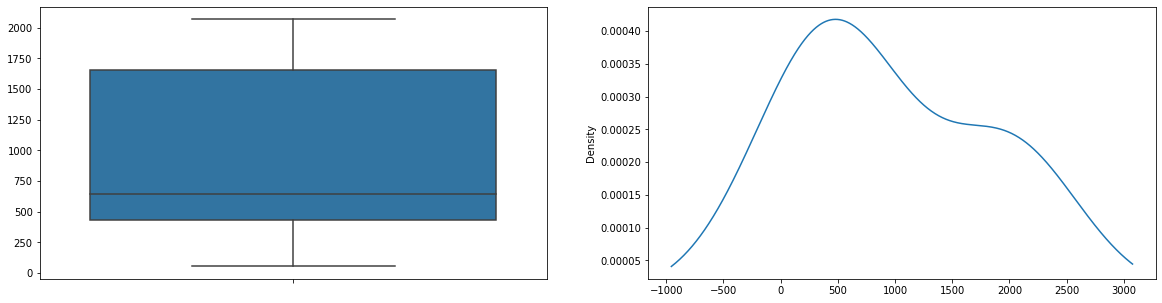

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.boxplot(data=education,y=education.values, ax=ax[0])
education.plot.kde(ax = ax[1])

In [56]:
print(education.skew())

0.6486777732125808


#### **education doesn;t have outliers, though there exists left skewness

### Deep-Insight of Occupation

In [57]:
#Occupation has 25 distinct values
data_train["occupation"].value_counts()

Unemployed                                   1485
Student                                      1245
Computer & Mathematical                      1111
Sales & Related                               896
Education&Training&Library                    753
Management                                    665
Arts Design Entertainment Sports & Media      526
Office & Administrative Support               517
Business & Financial                          433
Retired                                       394
Food Preparation & Serving Related            241
Healthcare Practitioners & Technical          205
Community & Social Services                   198
Healthcare Support                            186
Legal                                         179
Transportation & Material Moving              177
Life Physical Social Science                  140
Architecture & Engineering                    139
Personal Care & Service                       137
Protective Service                            135


<AxesSubplot:>

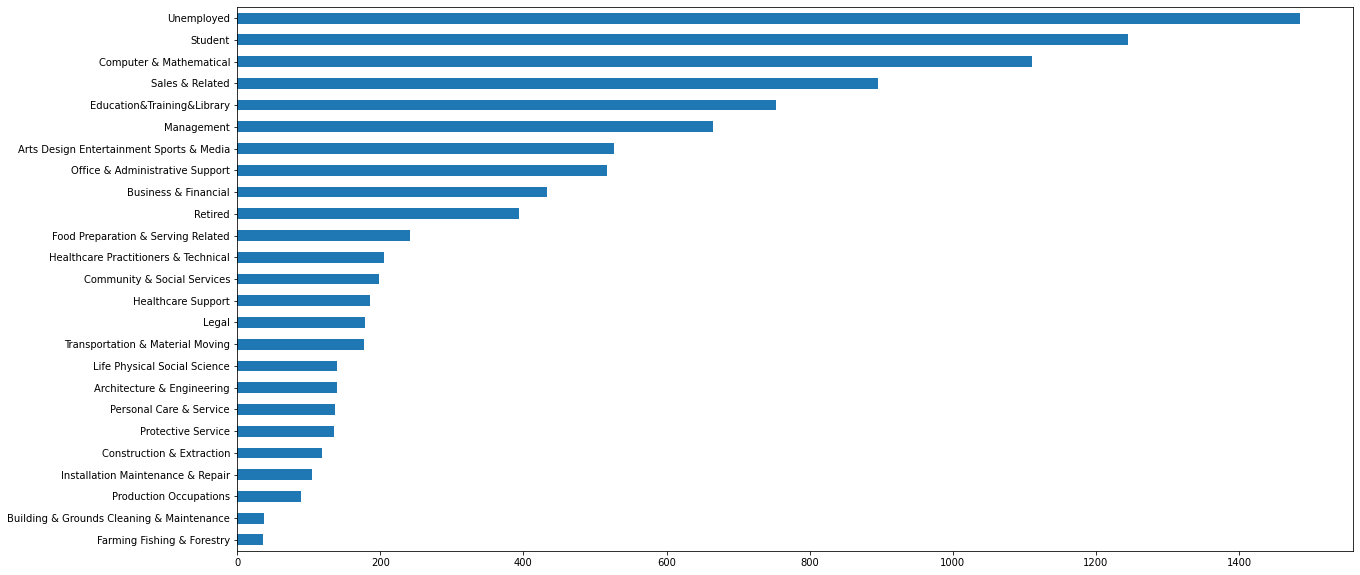

In [58]:
#bar graph for occupation
data_train["occupation"].value_counts().sort_values(ascending=True).plot.barh(figsize=(20,10))

In [59]:
# Check the outliers based on coupon usage (With in Y) in occupation
occupation = data_train[data_train['Y']==1]['occupation'].value_counts()
print(occupation.sum())
occupation

5768


Unemployed                                   806
Student                                      765
Computer & Mathematical                      638
Sales & Related                              498
Education&Training&Library                   391
Management                                   388
Office & Administrative Support              307
Arts Design Entertainment Sports & Media     280
Business & Financial                         249
Retired                                      184
Food Preparation & Serving Related           144
Healthcare Practitioners & Technical         139
Healthcare Support                           130
Transportation & Material Moving             108
Community & Social Services                   98
Architecture & Engineering                    89
Legal                                         84
Protective Service                            82
Construction & Extraction                     82
Personal Care & Service                       78
Life Physical Social

<AxesSubplot:ylabel='Density'>

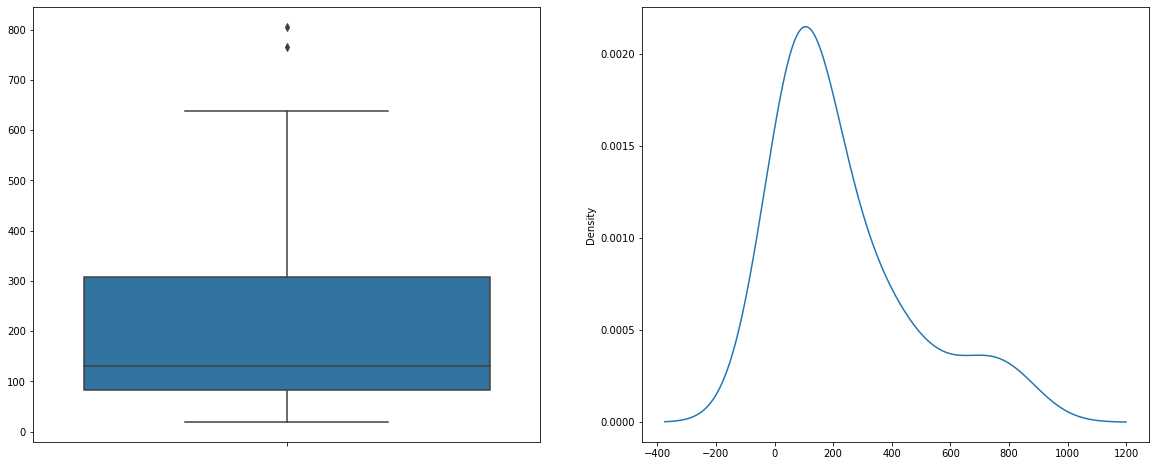

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.boxplot(data=occupation,y=occupation.values, ax=ax[0])
occupation.plot.kde(ax = ax[1])

In [61]:
# Removed the Skewness and outliers
occupaton_outlier = ['Unemployed','Student','Computer & Mathematical','Sales & Related','Education&Training&Library',\
                'Management','Office & Administrative Support','Arts Design Entertainment Sports & Media',\
                'Business & Financial','Retired']
data_train['occupation'] = data_train['occupation'].apply(lambda x: 'others' if x not in occupaton_outlier else x)
data_test['occupation'] = data_test['occupation'].apply(lambda x: 'others' if x not in occupaton_outlier else x)

#Reduce Categories and move other occupations to professionals 
#occupaton = ['Unemployed','Student']
#data_train['occupation'] = data_train['occupation'].apply(lambda x: 'Professionals' if x not in occupaton else x)
#data_test['occupation'] = data_test['occupation'].apply(lambda x: 'Professionals' if x not in occupaton else x)
data_train.occupation.value_counts()

others                                      2122
Unemployed                                  1485
Student                                     1245
Computer & Mathematical                     1111
Sales & Related                              896
Education&Training&Library                   753
Management                                   665
Arts Design Entertainment Sports & Media     526
Office & Administrative Support              517
Business & Financial                         433
Retired                                      394
Name: occupation, dtype: int64

<AxesSubplot:ylabel='Density'>

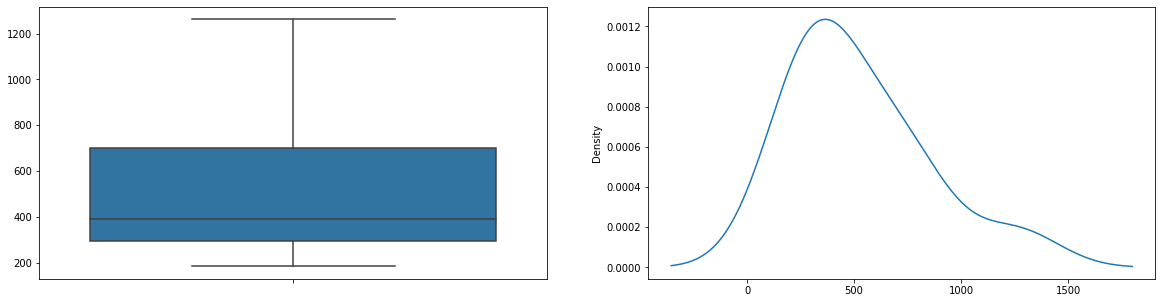

In [62]:
occupation = data_train[data_train['Y']==1]['occupation'].value_counts()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.boxplot(data=occupation,y=occupation.values, ax=ax[0])
occupation.plot.kde(ax = ax[1])

### Deep insight of income

In [63]:
#income has 9 distinct values
data_train["income"].value_counts()

$25000 - $37499     1622
$12500 - $24999     1464
$37500 - $49999     1444
$100000 or More     1408
$50000 - $62499     1318
Less than $12500     820
$87500 - $99999      712
$75000 - $87499      695
$62500 - $74999      664
Name: income, dtype: int64

<Figure size 1440x720 with 0 Axes>

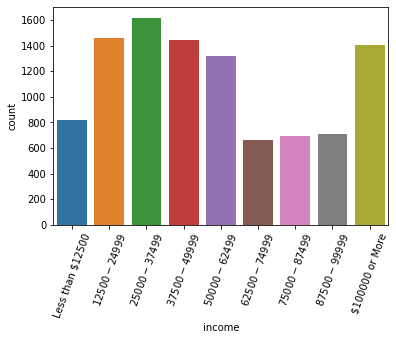

<Figure size 1440x720 with 0 Axes>

In [64]:
#bar graph for income
income_order = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "$100000 or More"]
chart = sns.countplot(data_train['income'], order = income_order)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(20,10))

In [65]:
# Check the outliers based on coupon usage (With in Y) in income
income = data_train[data_train['Y']==1]['income'].value_counts()
print(income.sum())
income

5768


$25000 - $37499     966
$12500 - $24999     848
$100000 or More     822
$37500 - $49999     809
$50000 - $62499     787
Less than $12500    480
$87500 - $99999     371
$62500 - $74999     356
$75000 - $87499     329
Name: income, dtype: int64

<AxesSubplot:ylabel='Density'>

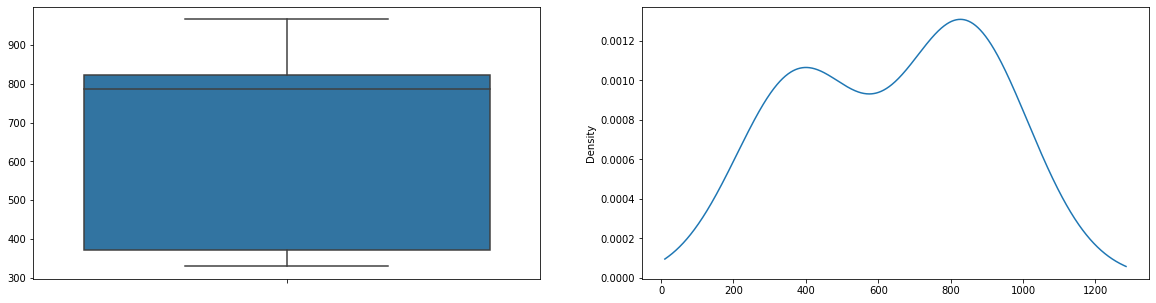

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.boxplot(data=income,y=income.values, ax=ax[0])
income.plot.kde(ax = ax[1])

In [67]:
print(income.skew())

-0.20304477193411624


#### **Income doesn;t have outliers, though there exists left skewness

### Deep-Insight of Bar

In [68]:
#Bar has 5 distinct values
data_train["Bar"].value_counts()

never    4238
less1    2781
1~3      1979
4~8       859
gt8       290
Name: Bar, dtype: int64

<Figure size 720x360 with 0 Axes>

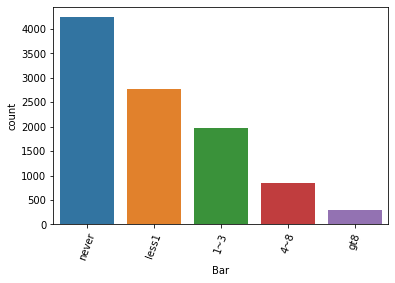

<Figure size 720x360 with 0 Axes>

In [69]:
bar_order = ["never", "less1", "1~3", "4~8", "gt8"]
chart = sns.countplot(data_train['Bar'], order = bar_order)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

### Deep-Insight of CoffeeHouse

In [70]:
#CoffeeHouse has 5 distinct values
data_train["CoffeeHouse"].value_counts()

less1    2868
1~3      2586
never    2375
4~8      1423
gt8       895
Name: CoffeeHouse, dtype: int64

<Figure size 720x360 with 0 Axes>

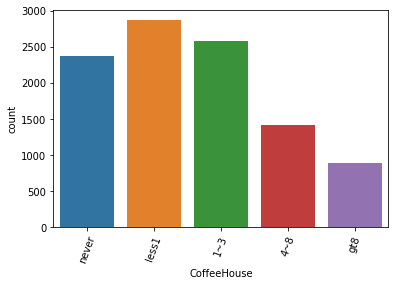

<Figure size 720x360 with 0 Axes>

In [71]:
CoffeeHouse_order = ["never", "less1", "1~3", "4~8", "gt8"]
chart = sns.countplot(data_train['CoffeeHouse'], order = CoffeeHouse_order)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

### Deep-Insight of CarryAway

In [72]:
#CarryAway has 5 distinct values
data_train["CarryAway"].value_counts()

1~3      3863
4~8      3416
less1    1485
gt8      1263
never     120
Name: CarryAway, dtype: int64

<Figure size 720x360 with 0 Axes>

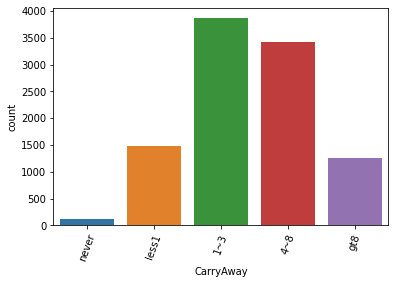

<Figure size 720x360 with 0 Axes>

In [73]:
CarryAway_order = ["never", "less1", "1~3", "4~8", "gt8"]
chart = sns.countplot(data_train['CarryAway'], order = CarryAway_order)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

### Deep-Insight of RestaurantLessThan20

In [74]:
#RestaurantLessThan20 has 5 distinct values
data_train["RestaurantLessThan20"].value_counts()

1~3      4393
4~8      2868
less1    1688
gt8      1025
never     173
Name: RestaurantLessThan20, dtype: int64

<Figure size 720x360 with 0 Axes>

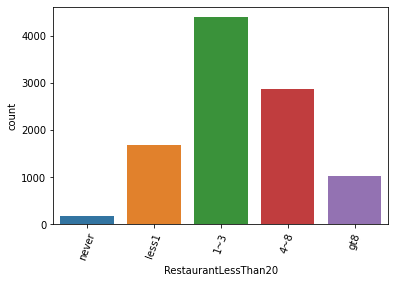

<Figure size 720x360 with 0 Axes>

In [75]:
RestaurantLessThan20_order = ["never", "less1", "1~3", "4~8", "gt8"]
chart = sns.countplot(data_train['RestaurantLessThan20'], order = RestaurantLessThan20_order)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

### Deep-Insight of Restaurant20To50

In [76]:
#Restaurant20To50 has 5 distinct values
data_train["Restaurant20To50"].value_counts()

less1    5037
1~3      2622
never    1693
4~8       579
gt8       216
Name: Restaurant20To50, dtype: int64

<Figure size 720x360 with 0 Axes>

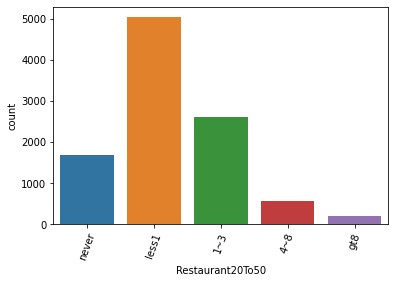

<Figure size 720x360 with 0 Axes>

In [77]:
Restaurant20To50_order = ["never", "less1", "1~3", "4~8", "gt8"]
chart = sns.countplot(data_train['Restaurant20To50'], order = Restaurant20To50_order)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

## Outlier analysis

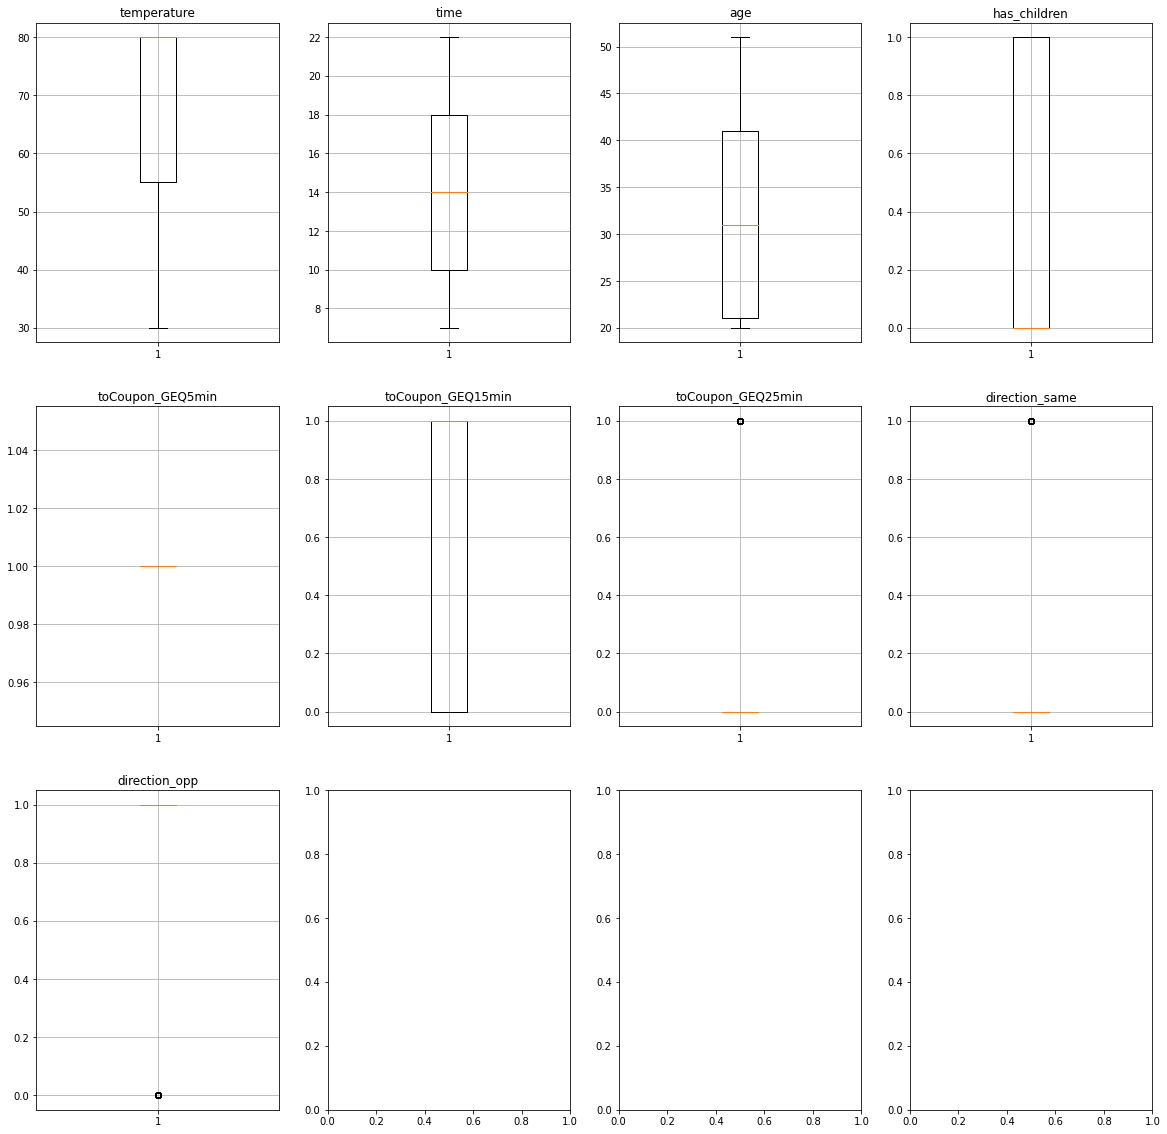

In [78]:
#Features with Outliers 
col_dict = {'temperature':1,'time':2,'age':3,'has_children':4,'toCoupon_GEQ5min':5,'toCoupon_GEQ15min':6,'toCoupon_GEQ25min':7,'direction_same':8,'direction_opp':9}

# Detect outliers in each variable using box plots.
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20,20))

for variable,i in col_dict.items():
    row = (i - 1) //4
    col = (i + 3) % 4
    #print(variable, i, row, col)
    ax[row, col].boxplot(data_train[variable])
    ax[row, col].set_title(variable)
    ax[row, col].grid()

In [79]:
#Features with Outliers 
numcol = ['temperature','time','age','has_children','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']
for column in numcol:
    if data_train[column].quantile(.9973)<data_train[column].max():
        print(column)
        print('99th Percentile',data_train[column].quantile(.9973))
        print('Max',data_train[column].max())
        print('Outliers Present in Column {}'.format(column))
        print('')
    elif data_train[column].quantile(0)>data_train[column].min():
        print(column)
        print('99th Percentile',data_train[column].quantile(.9973))
        print('Min',data_train[column].min())
        print('Outliers Present in Column {}'.format(column))
        print('')
    else:
        print('NO Outliers Present in Column {}'.format(column))

NO Outliers Present in Column temperature
NO Outliers Present in Column time
NO Outliers Present in Column age
NO Outliers Present in Column has_children
NO Outliers Present in Column toCoupon_GEQ5min
NO Outliers Present in Column toCoupon_GEQ15min
NO Outliers Present in Column toCoupon_GEQ25min
NO Outliers Present in Column direction_same
NO Outliers Present in Column direction_opp


### Distribution of numerical columns

#### **Customer ID is a unique column so we will remove the column while training the Model

<AxesSubplot:ylabel='temperature'>

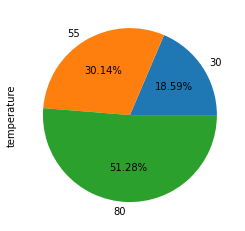

In [80]:
# Distribution of temperature
data_train["temperature"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:ylabel='time'>

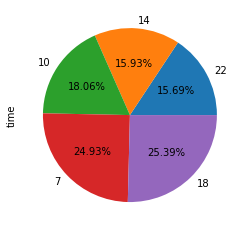

In [81]:
# Distribution of time
data_train["time"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:ylabel='age'>

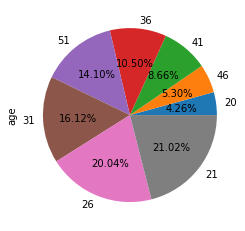

In [82]:
# Distribution of age
data_train["age"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:ylabel='has_children'>

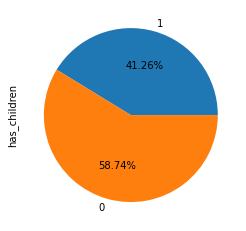

In [83]:
# Distribution of has_children
data_train["has_children"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:ylabel='toCoupon_GEQ5min'>

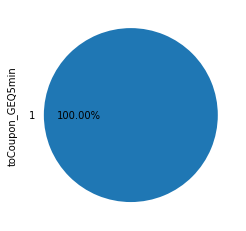

In [84]:
# Distribution of toCoupon_GEQ5min
data_train["toCoupon_GEQ5min"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

In [85]:
# As toCoupon_GEQ5min has only one constant value so we can remove it from train & test data
data_train.drop(columns = ["toCoupon_GEQ5min"], axis=1, inplace=True)
data_test.drop(columns = ["toCoupon_GEQ5min"], axis=1, inplace=True)

In [86]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  int64 
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  int64 
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  Bar                   10147 non-null

<AxesSubplot:ylabel='toCoupon_GEQ15min'>

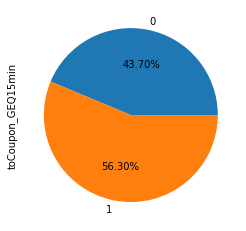

In [87]:
# Distribution of toCoupon_GEQ15min
data_train["toCoupon_GEQ15min"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:ylabel='toCoupon_GEQ25min'>

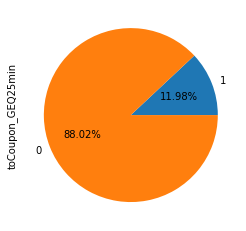

In [88]:
# Distribution of toCoupon_GEQ25min
data_train["toCoupon_GEQ25min"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:ylabel='direction_same'>

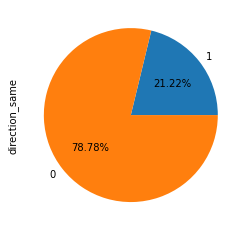

In [89]:
# Distribution of direction_same
data_train["direction_same"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

<AxesSubplot:ylabel='direction_opp'>

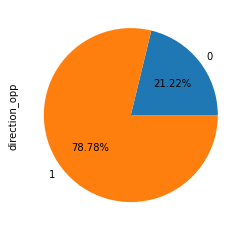

In [90]:
# Distribution of direction_opp
data_train["direction_opp"].value_counts().sort_values(ascending=True).plot.pie(autopct = '%.2f%%')

## Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='destination'>

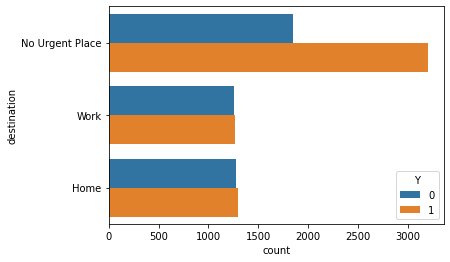

In [91]:
#Checking how many Coupon Use with the destination 
sns.countplot(y=data_train.destination, hue=data_train.Y)

<AxesSubplot:xlabel='count', ylabel='passanger'>

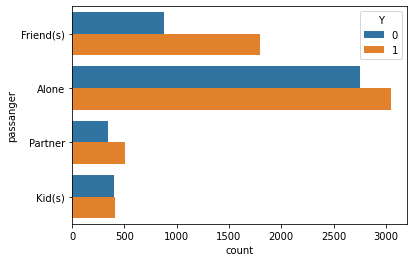

In [92]:
#Checking how many Coupon Use with the passanger 
sns.countplot(y=data_train.passanger, hue=data_train.Y)

<AxesSubplot:xlabel='count', ylabel='weather'>

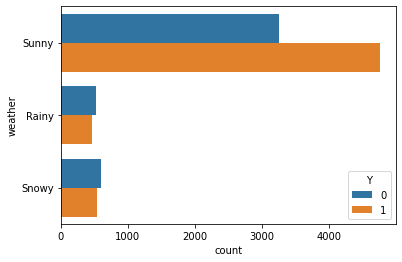

In [93]:
#Checking how many Coupon Use with the weather 
sns.countplot(y=data_train.weather, hue=data_train.Y)

<AxesSubplot:xlabel='count', ylabel='coupon'>

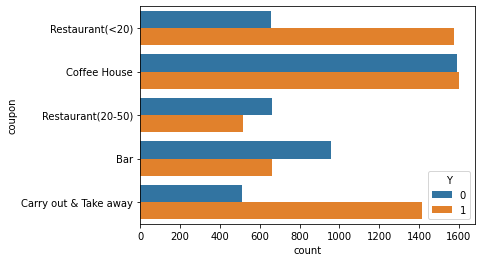

In [94]:
#Checking how many Coupon Use with the coupon 
sns.countplot(y=data_train.coupon, hue=data_train.Y)

<AxesSubplot:xlabel='count', ylabel='expiration'>

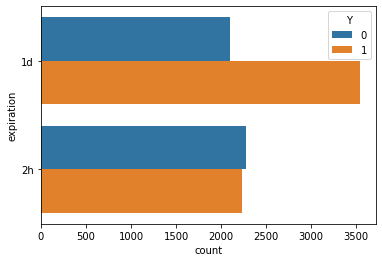

In [95]:
#Checking how many Coupon Use with the expiration 
sns.countplot(y=data_train.expiration, hue=data_train.Y)

<AxesSubplot:xlabel='count', ylabel='gender'>

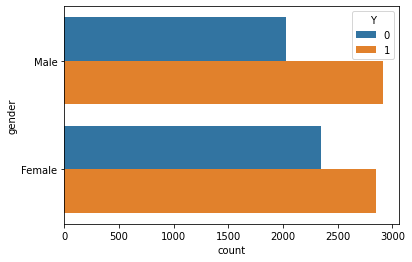

In [96]:
#Checking how many Coupon Use with the gender 
sns.countplot(y=data_train.gender, hue=data_train.Y)

<AxesSubplot:xlabel='count', ylabel='maritalStatus'>

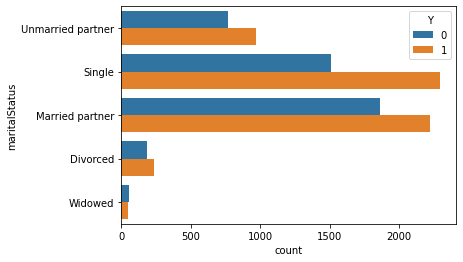

In [97]:
#Checking how many Coupon Use with the maritalStatus 
sns.countplot(y=data_train.maritalStatus, hue=data_train.Y)

<AxesSubplot:xlabel='count', ylabel='education'>

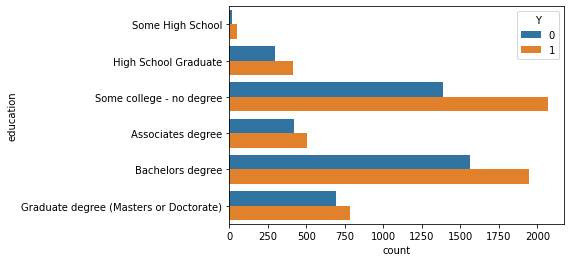

In [98]:
#Checking how many Coupon Use with the education 
sns.countplot(y=data_train.education, hue=data_train.Y, order = education_order)

<AxesSubplot:xlabel='count', ylabel='occupation'>

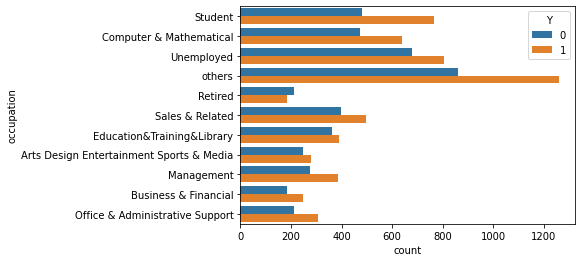

In [99]:
#Checking how many Coupon Use with the occupation 
sns.countplot(y=data_train.occupation, hue=data_train.Y)

<AxesSubplot:xlabel='count', ylabel='income'>

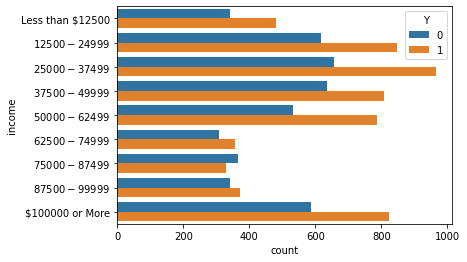

In [100]:
#Checking how many Coupon Use with the income 
sns.countplot(y=data_train.income, hue=data_train.Y, order = income_order)

<AxesSubplot:xlabel='count', ylabel='Bar'>

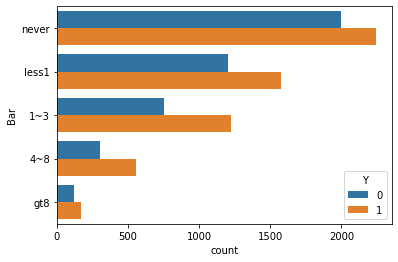

In [101]:
#Checking how many Coupon Use with the Bar 
sns.countplot(y=data_train.Bar, hue=data_train.Y, order = bar_order)

<AxesSubplot:xlabel='count', ylabel='CoffeeHouse'>

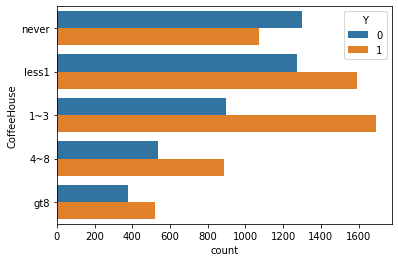

In [102]:
#Checking how many Coupon Use with the CoffeeHouse 
sns.countplot(y=data_train.CoffeeHouse, hue=data_train.Y, order = CoffeeHouse_order)

<AxesSubplot:xlabel='count', ylabel='CarryAway'>

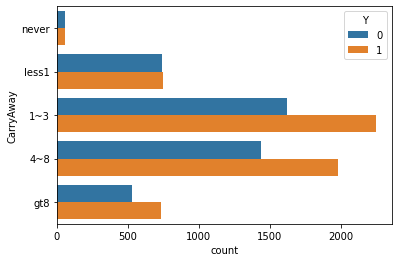

In [103]:
#Checking how many Coupon Use with the CarryAway 
sns.countplot(y=data_train.CarryAway, hue=data_train.Y, order = CarryAway_order)

<AxesSubplot:xlabel='count', ylabel='RestaurantLessThan20'>

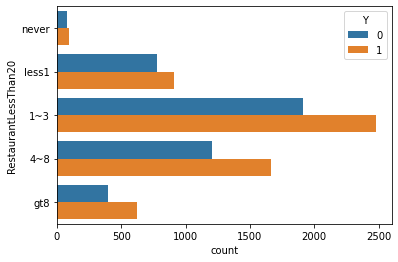

In [104]:
#Checking how many Coupon Use with the RestaurantLessThan20 
sns.countplot(y=data_train.RestaurantLessThan20, hue=data_train.Y, order = RestaurantLessThan20_order)

<AxesSubplot:xlabel='count', ylabel='Restaurant20To50'>

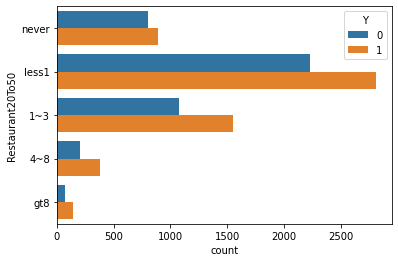

In [105]:
#Checking how many Coupon Use with the Restaurant20To50 
sns.countplot(y=data_train.Restaurant20To50, hue=data_train.Y, order = Restaurant20To50_order)

<AxesSubplot:xlabel='count', ylabel='age'>

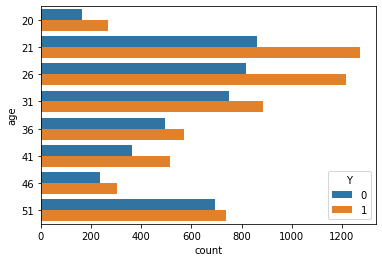

In [106]:
#Checking how many Coupon Use with the age 
sns.countplot(y=data_train.age, hue=data_train.Y)

In [107]:
pd.crosstab(index = data_train['age'], columns = data_train['Y'])

Y,0,1
age,,
20,164,268
21,862,1271
26,817,1216
31,751,885
36,495,570
41,363,516
46,235,303
51,692,739


<AxesSubplot:xlabel='count', ylabel='has_children'>

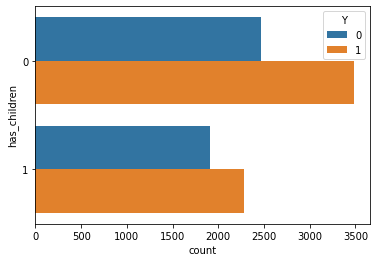

In [108]:
#Checking how many Coupon Use with the has_children
sns.countplot(y=data_train.has_children, hue=data_train.Y)

In [109]:
pd.crosstab(index = data_train['has_children'], columns = data_train['Y'])

Y,0,1
has_children,,
0,2471,3489
1,1908,2279


### ***Conclusion of Bi-variate analysis

### ***We can say that there is a High Usages of Coupon when:
    - Destination is "No Urgent Place".
    - Passanger is "Alone".
    - Weather is Sunny.
    - Coupon are Coffee House, Carry Out and Restaurent (<20).
    - Expiration is "1 Day".
    - "Marital Status" is "Single" or "Married Partner".
    - Education is "Some college - No degree" or "Bachelors degree".
    - Occupation is "Student" or "Unemployed" or "Others".
    - Income range "$25000 - $37499" or "$37500 - $49999" or "$12500 - $24999" or "$100000 or More".
    
    - Never go to Bar.
    - Go to a Cofee House in between 1 to 3 times.
    - Get Take-Away food in between 1 to 3 times.
    - Go to a restaurant with an average expense per person of less than $20 in between 1 to 3 times.
    
    - Go to a restaurant with an average expense per person of $20 - $50, less than 1 time
    - Age group from 21 to 31 and 50+.
    - No Children (Has_Children is zero).

### Multivariate Analysis

In [110]:
# Check all Vriable Type
pd.DataFrame(data_train.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
Y,2
toCoupon_GEQ15min,2
toCoupon_GEQ25min,2
direction_opp,2
has_children,2
gender,2
expiration,2
direction_same,2
temperature,3
weather,3


<AxesSubplot:>

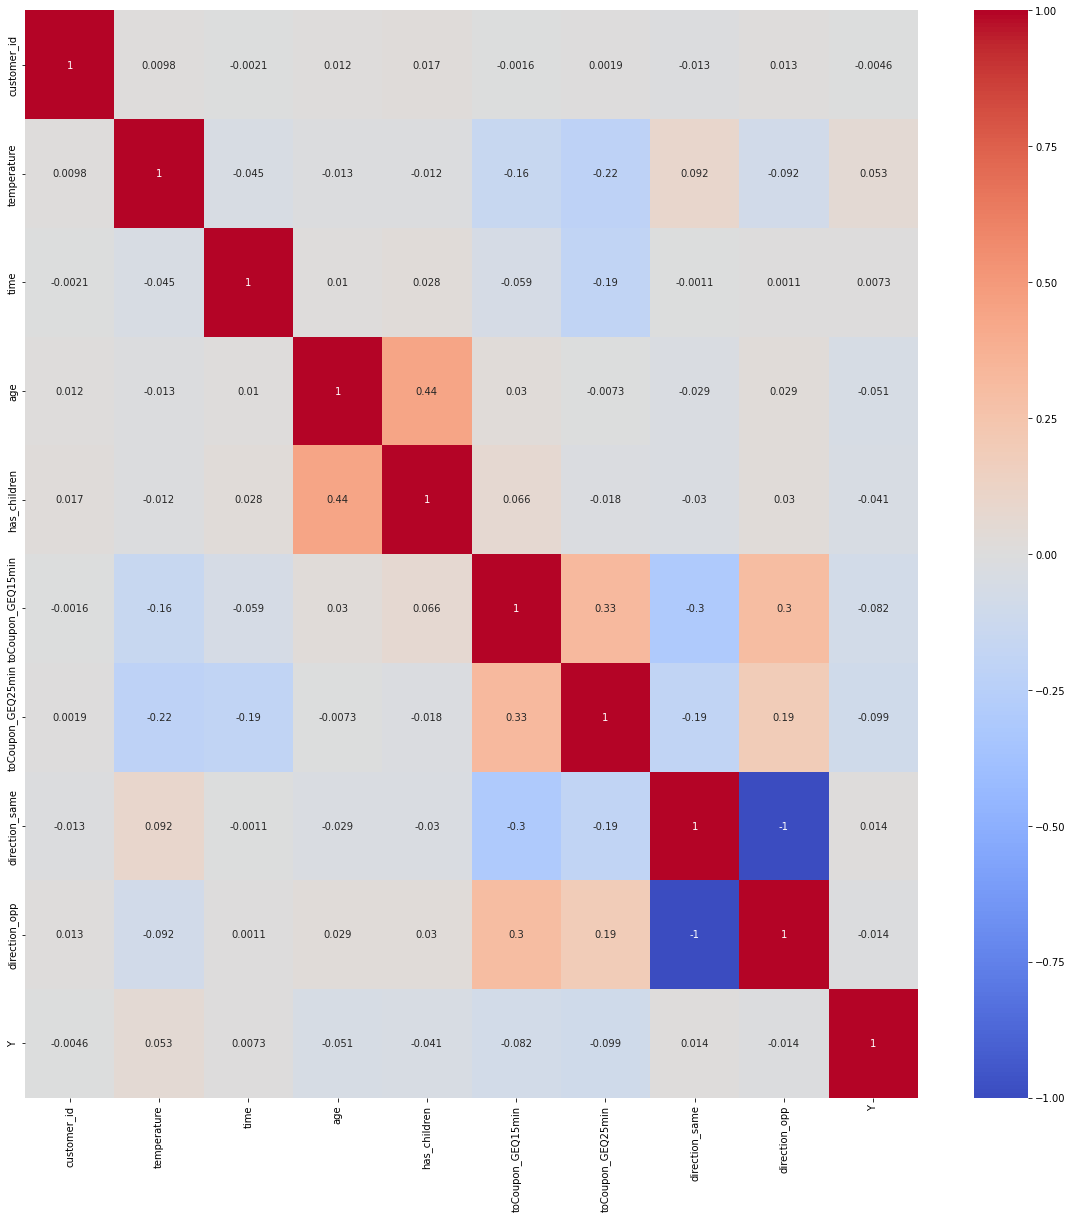

In [111]:
#Calculate the correlation for the dataset (Numeric values)
corr = data_train.corr()

#Setting the size of the figure
fig, ax = plt.subplots(figsize = (20,20)) 

#Plot the correlation using heatmap
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

#### ***If you look at the data, direction_same and direction_opp are inversely corelated, hence dropping one of the columns

In [112]:
data_train.drop(axis=1,columns=['direction_opp'],inplace=True)
data_test.drop(axis=1,columns=['direction_opp'],inplace=True)
print("Shape of Train Data:", data_train.shape)
print("Shape of Test Data:", data_test.shape)

Shape of Train Data: (10147, 24)
Shape of Test Data: (2537, 23)


## Encoding the Categorical Variables

In [113]:
#make a copy of data_train and data_test
#data_train_c = data_train.copy()
#data_test_c = data_test.copy()

In [114]:
# Ordinal Encoding for income
#income_mapper = {"Less than $12500": 1, "$12500 - $24999": 2, "$25000 - $37499": 3, "$37500 - $49999": 4, "$50000 - $62499": 5, "$62500 - $74999": 6, "$75000 - $87499": 7, "$87500 - $99999": 8, "$100000 or More": 9}
#data_train["income"] = data_train["income"].replace(income_mapper)
#data_test["income"] = data_test["income"].replace(income_mapper)    

In [115]:
# Ordinal Encoding for Education
#education_mapper = {"Some High School": 1, "High School Graduate": 2, "Some college - no degree": 3, "Associates degree": 4, "Bachelors degree": 5, "Graduate degree (Masters or Doctorate)": 6}
#data_train["education"] = data_train["education"].replace(education_mapper)
#data_test["education"] = data_test["education"].replace(education_mapper) 

In [116]:
# Ordinal Encoding for Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
#general_mapper = {"never": 1, "less1": 2, "1~3": 3, "4~8": 4, "gt8": 5}

#data_train["Bar"] = data_train["Bar"].replace(general_mapper)
#data_train["CoffeeHouse"] = data_train["CoffeeHouse"].replace(general_mapper)
#data_train["CarryAway"] = data_train["CarryAway"].replace(general_mapper)
#data_train["RestaurantLessThan20"] = data_train["RestaurantLessThan20"].replace(general_mapper)
#data_train["Restaurant20To50"] = data_train["Restaurant20To50"].replace(general_mapper)

#data_test["Bar"] = data_test["Bar"].replace(general_mapper)
#data_test["CoffeeHouse"] = data_test["CoffeeHouse"].replace(general_mapper)
#data_test["CarryAway"] = data_test["CarryAway"].replace(general_mapper)
#data_test["RestaurantLessThan20"] = data_test["RestaurantLessThan20"].replace(general_mapper)
#data_test["Restaurant20To50"] = data_test["Restaurant20To50"].replace(general_mapper)

In [117]:
# converting categorical columns to Numerical column
data_train_dummies = pd.get_dummies(data_train)
data_test_dummies = pd.get_dummies(data_test)

In [118]:
print("Shape of Train Data:", data_train_dummies.shape)
print("Shape of Test Data:", data_test_dummies.shape)

Shape of Train Data: (10147, 84)
Shape of Test Data: (2537, 83)


In [119]:
data_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 84 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   customer_id                                          10147 non-null  int64
 1   temperature                                          10147 non-null  int64
 2   time                                                 10147 non-null  int64
 3   age                                                  10147 non-null  int64
 4   has_children                                         10147 non-null  int64
 5   toCoupon_GEQ15min                                    10147 non-null  int64
 6   toCoupon_GEQ25min                                    10147 non-null  int64
 7   direction_same                                       10147 non-null  int64
 8   Y                                                    10147 non-null  int64
 9   destin

In [120]:
# Correlation of the numeric columns
data_train_dummies.corr().style.background_gradient()

#### ***We can infer from above correlation
Customer ID can be removed from the Model

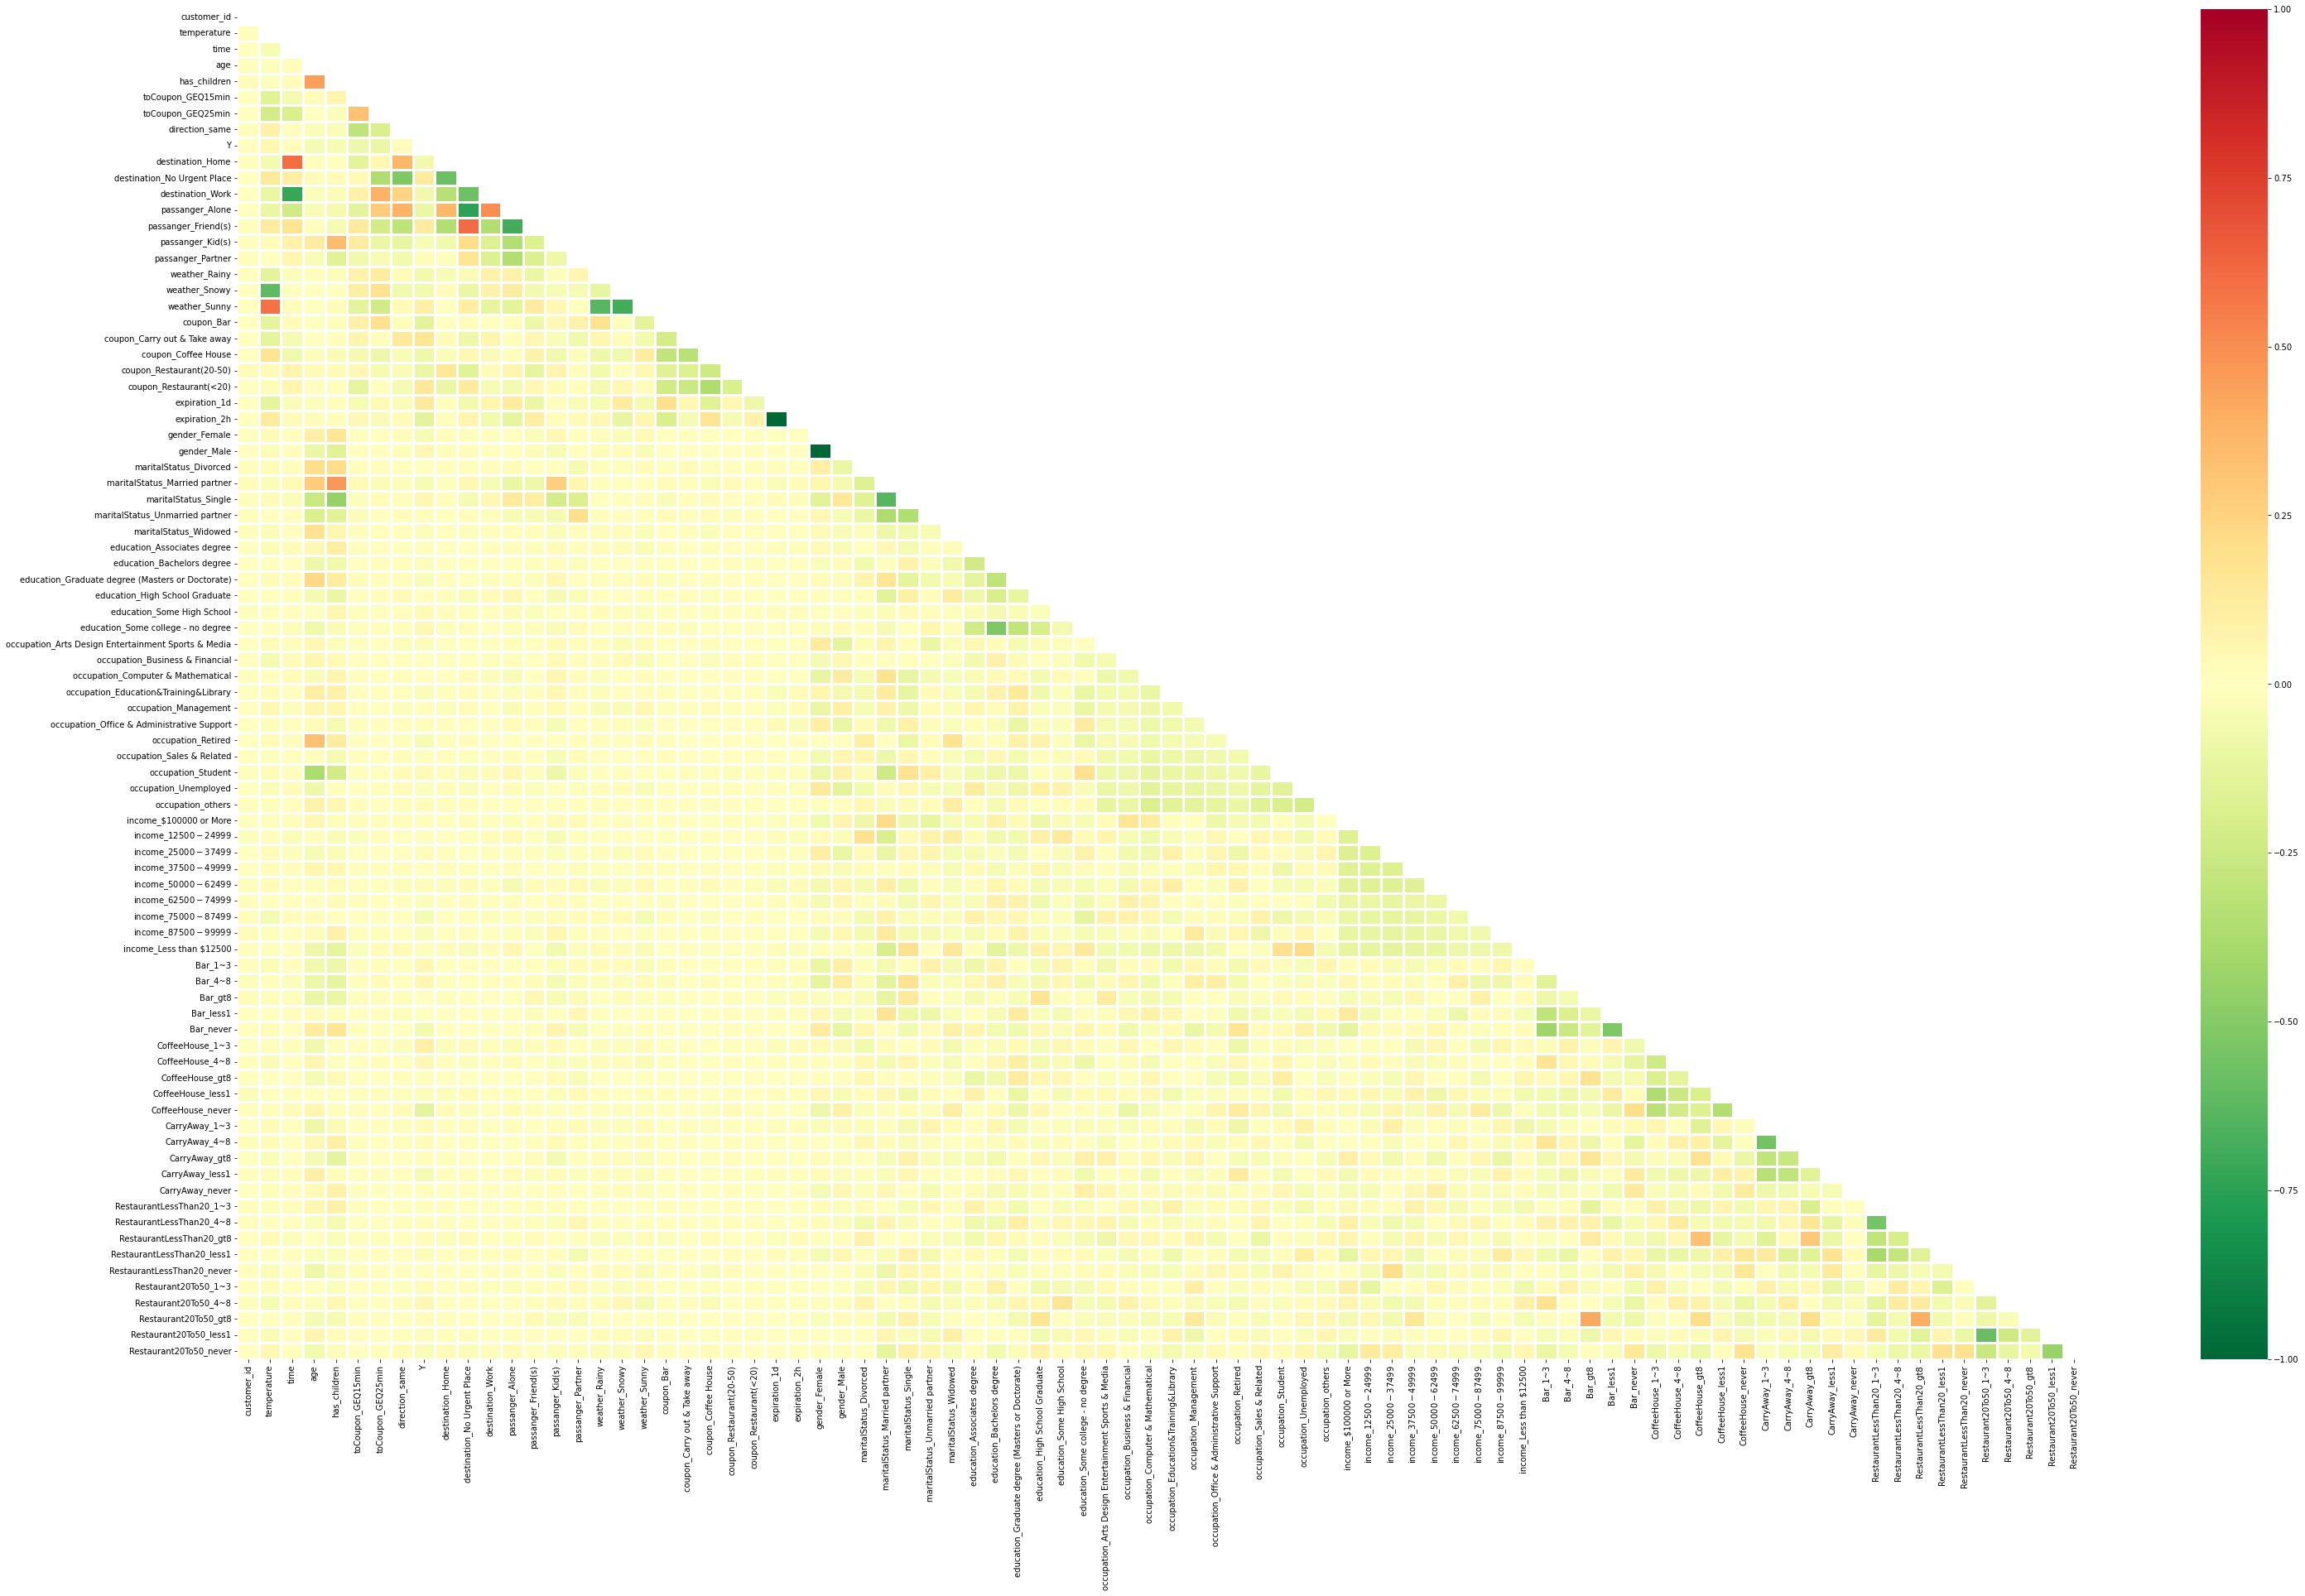

In [121]:
# Check Multicollinearity relations ship between variables using pearson method
corr = data_train_dummies.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,30))
sns.heatmap(corr, cmap = 'RdYlGn_r', vmax = 1.0, vmin = -1.0, mask=mask,linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig('Multicollinearity20220828.png')

#### ***In above analysis we have used the pearson method hence the values which are in between -1 and 1, hence all the
columns with 0 values can be removed based on the collinear relationship

Based on the analysis, we can remove the columns 'destination_Work', 'passanger_Alone', 'weather_Snowy', 'expiration_1d'
'maritalStatus_Married partner', gender_Female

In [122]:
#Dropping the columns as indentified during Correlation analysis
data_train_dummies.drop(columns = ['customer_id','destination_Work','passanger_Alone','weather_Snowy','expiration_1d','maritalStatus_Married partner','gender_Female'],inplace=True)
data_test_dummies.drop(columns = ['customer_id','destination_Work','passanger_Alone','weather_Snowy','expiration_1d','maritalStatus_Married partner','gender_Female'],inplace=True)

## Data-Set in to features and Target for Model Building

In [148]:
# Splitting the data in to feature and Target column
X_train  = np.array(data_train_dummies.drop(columns = 'Y'))
y_train  = np.array(data_train_dummies['Y'])
X_test   = np.array(data_test_dummies)
print(X_train.shape,y_train.shape,X_test.shape)

(10147, 76) (10147,) (2537, 76)


In [124]:
#scaler = StandardScaler().fit(X)
#X_scaled = pd.DataFrame(scaler.transform(X),
#                              columns=X.columns,
#                              index=X.index)
#X_test_scaled = pd.DataFrame(scaler.transform(data_test_dummies),
#                              columns=data_test_dummies.columns,
#                              index=data_test_dummies.index)
#print(X_scaled,y.shape,X_test_scaled)

## Model Building Start with all possible Alogirthms

### Logistic Regression Model

In [125]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Y_pred = logreg.predict(X_test)
LR_cv_results_acc = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print("%s k-fold Accuracy: %f (%f)" % ('LR', LR_cv_results_acc.mean(), LR_cv_results_acc.std()))

LR k-fold Accuracy: 0.681679 (0.001783)


### Support Vector Machines

In [126]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)
SVM_cv_results_acc = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
print("%s k-fold Accuracy: %f (%f)" % ('SVM', SVM_cv_results_acc.mean(), SVM_cv_results_acc.std()))

SVM k-fold Accuracy: 0.568444 (0.000182)


### Gaussian Naive Bayes

In [129]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
NB_cv_results_acc = cross_val_score(gaussian, X_train, y_train, cv=5, scoring='accuracy')
print("%s k-fold Accuracy: %f (%f)" % ('NB', NB_cv_results_acc.mean(), NB_cv_results_acc.std()))

NB k-fold Accuracy: 0.641471 (0.006376)


### Decision Tree

In [130]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
DT_cv_results_acc = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
print("%s k-fold Accuracy: %f (%f)" % ('DT', DT_cv_results_acc.mean(), DT_cv_results_acc.std()))

DT k-fold Accuracy: 0.678427 (0.011405)


### K nearest Neighbors

In [131]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
KNN_cv_results_acc = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("%s k-fold Accuracy: %f (%f)" % ('KNN', KNN_cv_results_acc.mean(), KNN_cv_results_acc.std()))

KNN k-fold Accuracy: 0.629054 (0.011729)


### Random Forest

In [132]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
RF_cv_results_acc = cross_val_score(random_forest, X_train, y_train, cv=7, scoring='accuracy')
print("%s k-fold Accuracy: %f (%f)" % ('RF', RF_cv_results_acc.mean(), RF_cv_results_acc.std()))

RF k-fold Accuracy: 0.763968 (0.009767)


### Best Score Out of All Algorithms are follow

In [150]:
models = {
    'Model': ['Support Vector Machines', 
              'Logistic Regression', 
              'Random Forest', 
              'Naive Bayes',
              'Decision Tree',
               'KNN'],
    
     'Cross ValidationScore_before': [
                
              SVM_cv_results_acc.mean(), 
              LR_cv_results_acc.mean(), 
              RF_cv_results_acc.mean(), 
              NB_cv_results_acc.mean(), 
              DT_cv_results_acc.mean(),
              KNN_cv_results_acc.mean()]

   
}
models = pd.DataFrame.from_dict(models, orient='index')
models = models.transpose()
models['Features']=len(data_train_dummies.columns)
models.sort_values(by=['Cross ValidationScore_before'],ascending=False).head(5)

,Model,Cross ValidationScore_before,Features
2,Random Forest,0.763968,77
1,Logistic Regression,0.681679,77
4,Decision Tree,0.678427,77
3,Naive Bayes,0.641471,77
5,KNN,0.629054,77


### Model Choosing

* **RandomForest** performs the best among all the models in all given training datasets; The performances of others models are not comparable with provided dataset. **KNN** is the worst model because it is too simple for this classfication task.

* In conclusion, in this classfication task, we could use **Random Forest** + **Hypertuning** to achieve best Cross Validation Score.

### Hypertuning

* 1. **RandomizedSearchCV** is used to narrow down the search so that same can be applied in Grid Search

In [171]:
params = {'n_estimators':list(range(3,400)),
          'criterion':['gini', 'entropy']}

clf = RandomForestClassifier()

random_forest = RandomizedSearchCV(estimator = clf, param_distributions=params,cv=5, n_iter=10, scoring='accuracy', random_state=88)

random_forest.fit(X_train,y_train)

y_pred = random_forest.predict(X_test)

#lf_cv_results_acc = cross_val_score(random_forest, X_train, y_train, cv=7, scoring='accuracy')
#print("%s k-fold Accuracy: %f (%f)" % ('RF', clf_cv_results_acc.mean(), clf_cv_results_acc.std()))

print("Tuned Hyperparameters :", random_forest.best_params_)
print("Accuracy :",random_forest.best_score_)



df_results=pd.DataFrame(random_forest.cv_results_)
df_results.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()

Tuned Hyperparameters : {'n_estimators': 305, 'criterion': 'entropy'}
Accuracy : 0.7668281834580843


,param_n_estimators,mean_test_score
9,305,0.766828
4,273,0.766630
6,164,0.766434
1,297,0.766335
7,128,0.765546


### 2. GridSearchCV
* Based on above RandonSearchCV, we have narrowed down the Range of Estimators **(290-310)**, Criterian:**'entropy'**.

In [172]:
params = {'bootstrap' : [False],
          'n_estimators':list(range(280,310)),
          'criterion':['entropy']}

clf = RandomForestClassifier(random_state=88)  
random_forest_grid = GridSearchCV(clf, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs=-1)

random_forest_grid.fit(X_train,y_train)

y_pred_grid = random_forest_grid.predict(X_test)

print("Tuned Hyperparameters :", random_forest_grid.best_params_)
print("Accuracy :",random_forest_grid.best_score_)

df_results1=pd.DataFrame(random_forest_grid.cv_results_)
df_results1.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()

Tuned Hyperparameters : {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 292}
Accuracy : 0.7696840695298608


,param_n_estimators,mean_test_score
12,292,0.769684
9,289,0.769487
14,294,0.769290
11,291,0.769093
2,282,0.768994


In [180]:
print("The Accuracy score of the model using Random Search is: %.2f%%" % (df_results[df_results['param_n_estimators']==305]['mean_test_score']*100))

print("The Accuracy score of the model using Grid search is: %.2f%%" % (df_results1[df_results1['param_n_estimators']==292]['mean_test_score']*100))

#print("%sK-fold Accuracy: %f (%f)" % ('With Grid Search :', CV_Grid.mean(), CV_Grid.std()))

The Accuracy score of the model using Random Search is: 76.68%
The Accuracy score of the model using Grid search is: 76.97%


* Based on the above Case as CV score of **Grid Search**  is comming max so same model used for predcition of Test data set.

In [173]:
data_test_=pd.read_csv('test.csv')
submission = pd.DataFrame({
        "CustomerID": data_test_["customer_id"],
        "Y": y_pred_grid # Based on the above Case as CV score of Grid Search is comming max so same model 
                         # used for predcition of Test data set
    })

submission.to_csv('submission.csv', index=False)
submission

,CustomerID,Y
0,374679,1
1,469678,1
2,216140,0
3,184301,0
4,148720,1
...,...,...
2532,356045,0
2533,498759,1
2534,356159,0
2535,218541,0


### Conclusion

* The test accuracy of the model is **76.11%** after submission of model. **TEAM DEEP DIVERS**.

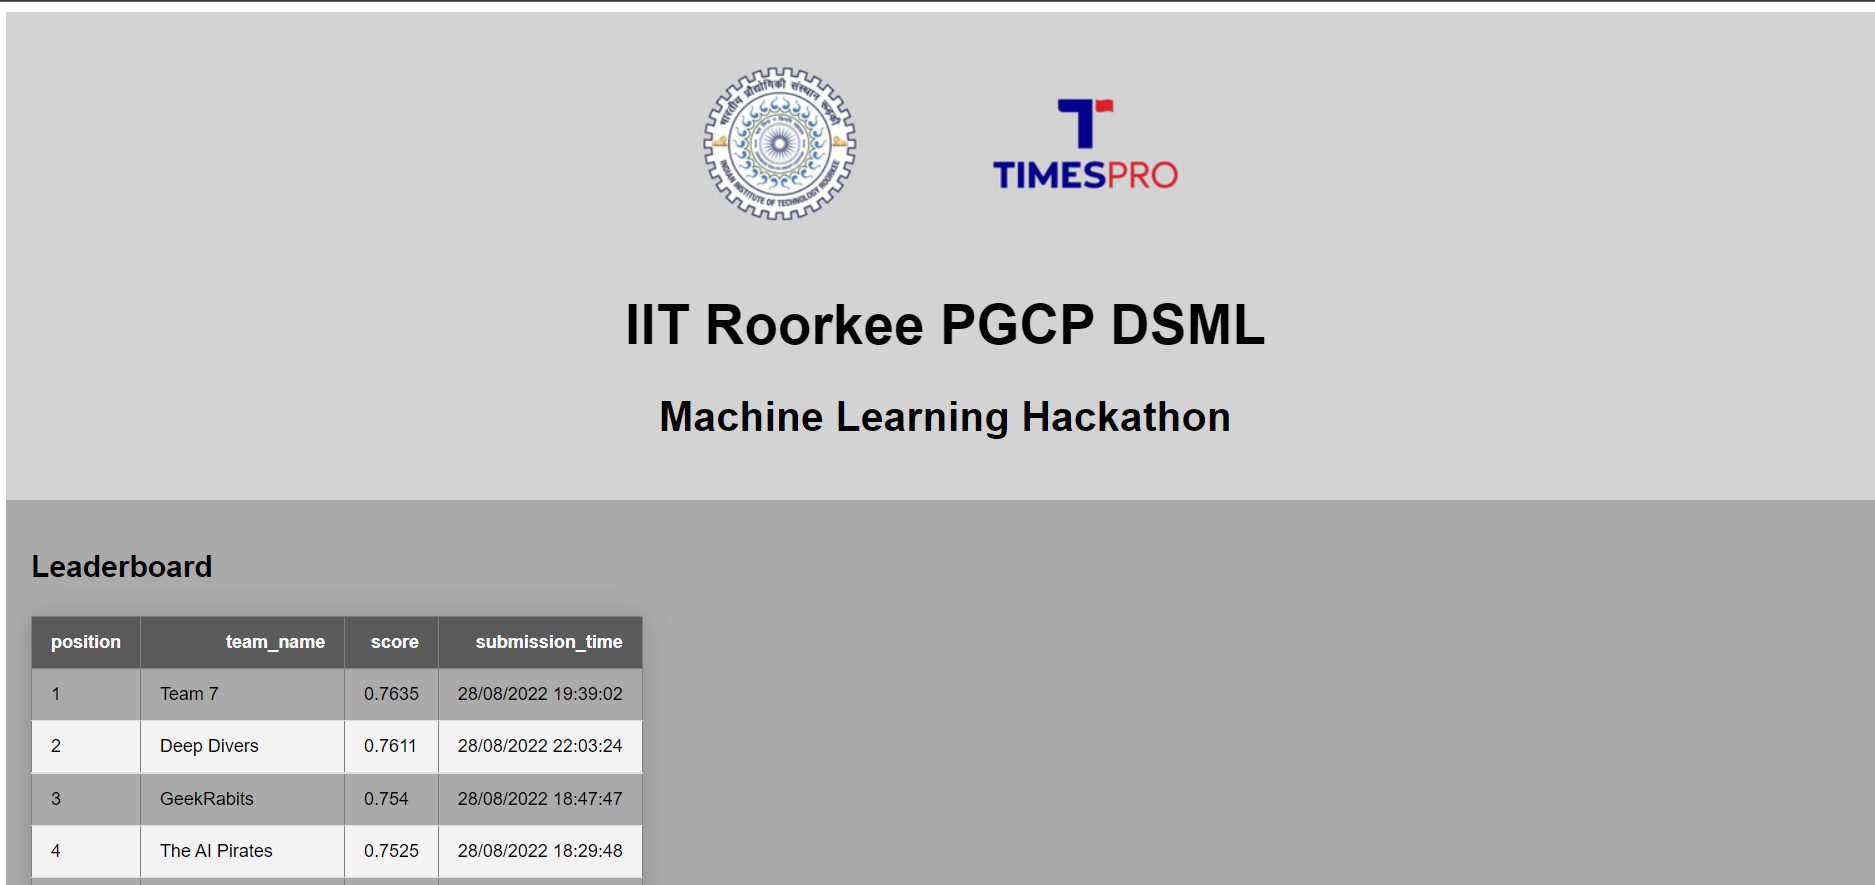